In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm, tqdm_notebook,tqdm_pandas
import itertools
import re
import json

In [2]:
#stopword
sw = list(pd.read_excel("stopword(cp949).xlsx",encoding = 'cp949')['불용어']) #불용어 불러오기
#개별 불용어 
with open('custom_sw.json') as load_file:
    custom_sw = json.load(load_file)

In [3]:
def count_word(df, tag, keyword, stopword, custom_sw, save_name="", start_year=2010, end_year=2019, gap=1, month=False, months="", save=True):
    '''단어가 등장한 횟수를 카운팅하고, 각 연도별 순위변동을 표시
    month변수를 사용하여 특정 월별로 데이터 한정 가능
    엑셀로 바로 출력해서 사용하기 위해 multi_column으로 출력

    Parameters
    ----------
        df (dataFrame): DataFrame
        tag (string) : 품사지정
        costom_sw (dict) : 카운팅에서 제외할 불용어사전
        save_name : 저장파일이름
        
        start_year (int) : 순위변동 확인시 시작할 연도위치
        end_year (int) : 순위변동 확인시 마지막 연도위치 
        gap (int): 연도별 기간차이 지정
        month (bool) : 특정월 추출여부
        months (list) : 추출할 월list
        save : 파일저장여부
       
    Returns
    -------
    vertical_df : DataFrame
    save = True일때  './new_output/연도별카운트/' 에 저장

    '''
    
    df = df.fillna("")
    df['Noun'] = df['Noun'].apply(lambda x : re.sub("[\[\]' ]","",x).split(','))
    df['Adjective'] = df['Adjective'].apply(lambda x : re.sub("[\[\]' ]","",x).split(','))
    
    #stopword
    stopword = stopword +[keyword]
    try :
        stopword = stopword +custom_sw[keyword]
        stopword = list(set(stopword))
    except:
        pass
    
    main_df = pd.DataFrame()

    if month == True:
        df = df[df.month.isin(months)]
    for s_year in range(2010, 2020):
        word_year_df = df[df['year'] == s_year]

        target_df = list(itertools.chain(*word_year_df[tag]))
        counted = pd.DataFrame(
            pd.Series(target_df).value_counts()).reset_index()
        counted.columns = ['name', 'value']

        drop_row = counted[counted['name'].isin(stopword)].index
        counted.drop(drop_row, inplace=True)
        counted = counted.head(15)

        counted['year'] = s_year
        counted['rank'] = counted.value.rank(ascending=False, method='dense')
        main_df = pd.concat([main_df, counted])

    # gap
    main_df['gap'] = 0
    years = []
    for one_year in range(start_year, end_year+1, gap):
        years.append(one_year)
        names = main_df.loc[(main_df['year'] == one_year), "name"].values
        for name in names:
            try:
                new_rank = main_df.loc[(main_df['year'] == one_year) & (
                    main_df['name'] == name), 'rank'].values[0]
                old_rank = main_df.loc[(
                    main_df['year'] == one_year-gap) & (main_df['name'] == name), 'rank'].values[0]
                main_df.loc[(main_df['year'] == one_year) & (
                    main_df['name'] == name), 'gap'] = old_rank-new_rank
            except:
                main_df.loc[(main_df['year'] == one_year) & (
                    main_df['name'] == name), 'gap'] = "NEW"
    main_df = main_df[main_df['year'].isin(years)]
    main_df.drop('rank', axis=1, inplace=True)
    main_df.reset_index(drop = True, inplace = True)
    #vertical
    vertical_df = pd.DataFrame()
    for year in main_df.year.unique():
        sperated = main_df[main_df.year == year].reset_index(drop = True)
        vertical_df = pd.concat([vertical_df,sperated],axis = 1)
    
    #col_name_change 
    iteration = len(vertical_df.columns)//4
    col_names = ["키워드","검색량","year","순위"] * iteration
    vertical_df.columns = col_names
    
    #mult_cols
    years = vertical_df.year.iloc[0].values
    years_cols =[]
    for year in years:
        years_cols.extend([year]*3)
        
    vertical_df =vertical_df.drop('year',axis =1)
    origin_col = vertical_df.columns.values

    vertical_df.columns =[years_cols,origin_col]
    
    if save == True:
        os.makedirs('./new_output/검색어변화추이/',exist_ok=True)
        vertical_df.to_csv('./new_output/검색어변화추이/{save_name}.csv'.format(
            save_name=save_name), encoding='cp949', index='False')

    return main_df, vertical_df

In [5]:
all_df = pd.read_csv(path+file)

In [4]:
path = './new_output/token_통합/'
file_list = os.listdir(path)

for file in tqdm_notebook(file_list):
    all_df = pd.read_csv(path+file)
    keyword = file.split('_')[0].split('+')[0].replace(' ','')
    count_word(all_df, 'Noun', keyword, sw,custom_sw, start_year=2011, end_year=2019, gap = 2, save_name = f'{keyword}_2년_gap명사')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


AttributeError: 'DataFrame' object has no attribute 'year'

In [5]:
def count_word(df, tag, keyword, stopword, custom_sw, save_name="", start_year=2010, end_year=2019, gap=1, month=False, months="", save=True):
    '''단어가 등장한 횟수를 카운팅하고, 각 연도별 순위변동을 표시
    month변수를 사용하여 특정 월별로 데이터 한정 가능
    엑셀로 바로 출력해서 사용하기 위해 multi_column으로 출력

    Parameters
    ----------
        df (dataFrame): DataFrame
        tag (string) : 품사지정
        costom_sw (dict) : 카운팅에서 제외할 불용어사전
        save_name : 저장파일이름
        
        start_year (int) : 순위변동 확인시 시작할 연도위치
        end_year (int) : 순위변동 확인시 마지막 연도위치 
        gap (int): 연도별 기간차이 지정
        month (bool) : 특정월 추출여부
        months (list) : 추출할 월list
        save : 파일저장여부
       
    Returns
    -------
    vertical_df : DataFrame
    save = True일때  './output/연도별카운트/' 에 저장

    '''
    
    df = df.fillna("")
    df['Noun'] = df['Noun'].apply(lambda x : re.sub("[\[\]' ]","",x).split(','))
    df['Adjective'] = df['Adjective'].apply(lambda x : re.sub("[\[\]' ]","",x).split(','))
    
    #stopword
    stopword = stopword +[keyword]
    try :
        stopword = stopword +custom_sw[keyword]
        stopword = list(set(stopword))
    except:
        pass
    
    main_df = pd.DataFrame()

    if month == True:
        df = df[df.month.isin(months)]
    for s_year in range(2010, 2020):
        word_year_df = df[df['year'] == s_year]

        target_df = list(itertools.chain(*word_year_df[tag]))
        counted = pd.DataFrame(
            pd.Series(target_df).value_counts()).reset_index()
        counted.columns = ['name', 'value']

        drop_row = counted[counted['name'].isin(stopword)].index
        counted.drop(drop_row, inplace=True)
        counted = counted.head(40)

        counted['year'] = s_year
        counted['rank'] = counted.value.rank(ascending=False, method='dense')
        main_df = pd.concat([main_df, counted])

    # gap
    main_df['gap'] = 0
    years = []
    for one_year in range(start_year, end_year+1, gap):
        years.append(one_year)
        names = main_df.loc[(main_df['year'] == one_year), "name"].values
        for name in names:
            try:
                new_rank = main_df.loc[(main_df['year'] == one_year) & (
                    main_df['name'] == name), 'rank'].values[0]
                old_rank = main_df.loc[(
                    main_df['year'] == one_year-gap) & (main_df['name'] == name), 'rank'].values[0]
                main_df.loc[(main_df['year'] == one_year) & (
                    main_df['name'] == name), 'gap'] = old_rank-new_rank
            except:
                main_df.loc[(main_df['year'] == one_year) & (
                    main_df['name'] == name), 'gap'] = "NEW"
    main_df = main_df[main_df['year'].isin(years)]
#     main_df.drop('rank', axis=1, inplace=True)
    main_df.reset_index(drop = True, inplace = True)
#     #vertical
#     vertical_df = pd.DataFrame()
#     for year in main_df.year.unique():
#         sperated = main_df[main_df.year == year].reset_index(drop = True)
#         vertical_df = pd.concat([vertical_df,sperated],axis = 1)
    
#     #col_name_change 
#     iteration = len(vertical_df.columns)//4
#     col_names = ["키워드","검색량","year","순위"] * iteration
#     vertical_df.columns = col_names
    
#     #mult_cols
#     years = vertical_df.year.iloc[0].values
#     years_cols =[]
#     for year in years:
#         years_cols.extend([year]*3)
        
#     vertical_df =vertical_df.drop('year',axis =1)
#     origin_col = vertical_df.columns.values

#     vertical_df.columns =[years_cols,origin_col]
    
#     if save == True:
#         os.makedirs('./output/검색어변화추이/',exist_ok=True)
#         vertical_df.to_csv('./output/검색어변화추이/{save_name}.csv'.format(
#             save_name=save_name), encoding='cp949', index='False')

    return main_df

In [6]:
#잠시 rank용 
path = './output/token_통합/'
file_list = os.listdir(path)

for file in tqdm_notebook(file_list):
    all_df = pd.read_csv(path+file)
    keyword = file.split('_')[0].split('+')[0].replace(' ','')
    main_df= count_word(all_df, 'Noun', keyword,sw,custom_sw, start_year=2011, end_year=2019, gap = 1, save_name = f'{keyword}_2년_gap명사',
                                     save=False)
    #그래프
    main_df.year = main_df.year.astype(int)
    name_2019 = main_df[(main_df.year == 2019)&(main_df['rank'] <= 10)].name.values

    plt.figure(figsize=(10,7))
    sns.lineplot(x = 'year',y = 'rank', hue = 'name', data = main_df[main_df.name.isin(name_2019)],palette='tab20')
    plt.ylim((15,0))
    plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5),fontsize= 12)
    plt.savefig(f'./output/검색어변화추이/{keyword}_검색어추이.png', bbox_inches='tight')
    plt.close()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


KeyboardInterrupt: 

In [ ]:
target = main_df[main_df.name.isin(name_2019)]

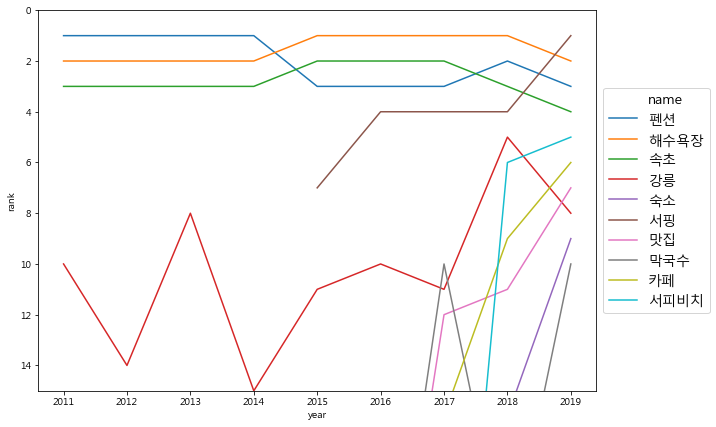

In [7]:
main_df.year = main_df.year.astype(int)
name_2019 = main_df[(main_df.year == 2019)&(main_df['rank'] <= 10)].name.values

plt.figure(figsize=(10,7))
sns.lineplot(x = 'year',y = 'rank', hue = 'name', data = target,
             palette='tab20')
plt.ylim((15,0))
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5),fontsize= 14)
plt.savefig(f'./output/검색어변화추이/{keyword}_검색어추이.png', bbox_inches='tight')
# plt.close()